# Python for Data Science Workshop - Spring 2018
June 14, 2018

Instructor: Fernando Rodriguez

Clickstream examples and exercises provided by Jihyun Park

## Session 9: NumPy library for making data matricies, Matplotlib library for making graphs, Exporting CSV files

In session 8, we were able to go through all of the necessary steps to get our data into a dictionary.

We are now going to convert the dictionary data into a dataset, which we can finally use to analyze our data and export to a csv file. 

#### Let's first load up our importing script from Session 8. Make sure to include the get_cats_from_url() function as well.

In [6]:
def get_cats_from_url(url):
    if len(url.split('/')) < 6:
        return "homepage"
    else:
        return url.split('/')[5]

In [7]:
import os
import csv
from datetime import datetime, timedelta # importing datetime module


data = {}

rid = []

dt_format = "%Y-%m-%dT%H:%M:%SZ"   # date-time format


dataDir = "/Volumes/GoogleDrive/My Drive/Python Workspace/Python-for-Data-Science-Workshop/s6data"

for files in os.listdir(dataDir):
    if not files.startswith('.') and not files.startswith("Icon"):
        csvFiles = os.path.join(dataDir, files)
        rid = (files.split(".")[0])

        url_list = [] # these need to be indented here!!!!!!
        ts_list = []
        ip_list  = []
        cat_list = [] 
        
        with open(csvFiles, 'r') as f:
            reader = csv.reader(f, delimiter=",")
            header = reader.next()

            for line in reader: 
                url = line[1]
                cat = get_cats_from_url(url)
                ts = datetime.strptime(line[3], dt_format)
                ip = line[5]

                url_list.append(url)
                cat_list.append(cat)
                ts_list.append(ts)
                ip_list.append(ip)


        studentData = {"urls":url_list, "ts":ts_list, "ips":ip_list, "cats": cat_list}

        data[rid] = studentData

In [4]:
# checking data
data['104500']['urls'][0:10]

['https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1',
 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039',
 'https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400',
 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039',
 'https://canvas.eee.uci.edu/courses/2230',
 'https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1',
 'https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?module_item_id=62386',
 'https://canvas.eee.uci.edu/courses/2230',
 'https://canvas.eee.uci.edu/courses/2230/files/748147?module_item_id=62454',
 'https://canvas.eee.uci.edu/courses/2230']

In [5]:
# checking data
data['104716']['urls'][0:10]

['https://ucirvine.instructure.com/courses/2230/assignments/49367',
 'https://ucirvine.instructure.com/courses/2230',
 'https://ucirvine.instructure.com/courses/2230/quizzes/8316?module_item_id=62462',
 'https://ucirvine.instructure.com/courses/2230',
 'https://ucirvine.instructure.com/courses/2230/assignments/49395',
 'https://canvas.eee.uci.edu/courses/2230/assignments/49367?module_item_id=62451',
 'https://canvas.eee.uci.edu/courses/2230/assignments/49367?module_item_id=62451',
 'https://canvas.eee.uci.edu/courses/2230/assignments/49367?module_item_id=62451',
 'https://canvas.eee.uci.edu/courses/2230',
 'https://ucirvine.instructure.com/courses/2230/assignments/49374?module_item_id=62441']

<br><br>
### Using Numpy library to convert data to matrix
It's a Python library focuses on matricies (also known as arrays).

We will use this library to convert our data dictionary into a matrix. 

Our rows will be students, and the colums will be our days. 

We will compute the total number of clicks per day for each student.

In [13]:
import numpy as np

#### .zeros and .ones modules are useful for initializing datasets
np.zeros() : Initializing numpy arrays to zeros<br>
np.ones() : Initializaing numpy arrays to ones<br>

In [274]:
# the first argument, 5, tells Pyton to make 5 rows
# the second argument, 6, tells Python to make 10 colums
np.zeros((5, 10)) # you need two parentheses 

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [275]:
np.ones((5, 10))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

<br>
### Creating arrays from the clickstream data

We first need to create our array before we can put our data into it.

We need to do two things to set this up.

1) decide what we are going to define as the first day of the course. let's select June 13, 2016 as our start day.

2) set the number of maximum days, which is the number of days between the start of the course and the end of the course. Let's do 50 days for this example.


In [100]:
first_day = datetime(2016, 6, 13, 0, 0, 0)
max_days = 50
# 49 days after 6-13-2016 is 8-1-2016

#### Array for single student csv file
Now we are going to create an array. For now, we are just going to obtain the total number of clicks per day for a single student

In [299]:
# initializing
nclicks_per_day = np.zeros(max_days)

In [300]:
nclicks_per_day

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [301]:
# this is a one dimensional aray
nclicks_per_day.shape

(50,)

Now we wan to create an array of number of clicks using a single csv file. 

We can do this for a single student in our dictionary, data.

To obtain the number of clicks, we need a to utilize the timestamp key-value pair.

We will create a counter.

In [285]:
first_day = datetime(2016, 6, 13, 0, 0, 0) # specifying first day of class
max_days = 50 # this value will be the size of each row

# creating matrix that will capture number of clicks per day on the nth day since the first day
# right now, this is a 1-dimensional array
nclicks_per_day = np.zeros(max_days, dtype = np.int32) # np.int32 specifies datetime type

studentExample = data['104500']

# we want to store the number of clicks using timedelta
# the 'time' refers to each timestamp
# delta will be a timedelta object using .days methods

for time in studentExample['ts']:
    delta = time - first_day
    if 0 <= delta.days < max_days: # If delta.days is equal to or larger than zero, but smaller than max days
        nclicks_per_day[delta.days] += 1 #increase by 1, which wil count how many events happen within a given day
        # above line same as doing this: nclicks_per-day[delta.days] = nclicks_per-day[delta.days] + 1
    

Let's manually check whether these counts are correct by opening the '104500.csv' file. We know that the final day is 8-1-2016, so lets count the number of time-stamped events for that day.

In [292]:
print nclicks_per_day
print nclicks_per_day.shape

[ 0  0  0  0  0  0  0  7  0 25  2 11  4  4  2  9 12 17  3  1 13  0  4 10  0
  6  0  0  8  5  2  5  5  4 38 33 17  6 15  7  5 11  3 13  7  0  0  0  0  5]
(50,)


### Single student array function
You can make this a function by putting all of the initialized variables in the argument.

When you put in arguments this way, these will be the default values.

In [302]:
def get_nclicks_per_day(data, max_days = 50, first_day = datetime(2016, 6, 13, 0, 0, 0)):
    nclicks_per_day = np.zeros(max_days)
    for time in data['ts']:
        delta = time - first_day
        if 0 <= delta.days < max_days: # if  delta.days is within this range (<=0 but < max_days)
            nclicks_per_day[delta.days] += 1
    
    return nclicks_per_day


In [303]:
print get_nclicks_per_day(data['104500'])
print nclicks_per_day.shape

[  0.   0.   0.   0.   0.   0.   0.   7.   0.  25.   2.  11.   4.   4.   2.
   9.  12.  17.   3.   1.  13.   0.   4.  10.   0.   6.   0.   0.   8.   5.
   2.   5.   5.   4.  38.  33.  17.   6.  15.   7.   5.  11.   3.  13.   7.
   0.   0.   0.   0.   5.]
(50,)


<br>
### Array for all student csv files
Now we need to create a matrix for the entire data in our data dictionary. 

This will now be a two dimensional matrix.

In [149]:
len(data)

4

In [309]:
n_students = len(data)
n_students
max_days = 50

nclicks_per_day_mat = np.zeros((n_students, max_days))

In [310]:
print nclicks_per_day_mat
print nclicks_per_day_mat.shape # two-dimensional matrix

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
(4, 50)


To save as each of the rows, we need the row indexes, not the random ids. 

We will create idx = 0 and increment by 1 whenever we fill in the rows.


In [311]:
n_students = len(data)
max_days = 50

nclicks_per_day_mat = np.zeros((n_students, max_days))

idx = 0

for rid in data.keys():
    nclicks_per_day_mat[idx, :] = get_nclicks_per_day(data[rid]) # [idx, :] <- we are assigning idx to the row
    idx += 1 # same as writing idx = idx +1
    

In [257]:
print nclicks_per_day_mat

[[  5.   0.   0.   0.   0.   4.  33.   1.  22.   0.  17.  19.   2.  27.
   17.   0.   0.  19.   0.   3.   2.   1.   2.   0.   0.  10.   4.  10.
    0.   4.   5.   6.   3.   6.   4.   6.   3.  25.   6.   4.   7.   3.
    3.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  16.   0.   0.   8.   8.   6.   3.  18.   2.   5.   9.  13.
    6.  11.   7.   0.   4.   2.   9.   3.  11.   1.   8.   6.   4.  16.
   11.   6.  14.   9.   7.   0.   8.   0.  50.   8.   1.   6.   0.   3.
    2.   2.   0.   2.   0.   2.   2.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   7.   0.  25.   2.  11.   4.   4.
    2.   9.  12.  17.   3.   1.  13.   0.   4.  10.   0.   6.   0.   0.
    8.   5.   2.   5.   5.   4.  38.  33.  17.   6.  15.   7.   5.  11.
    3.  13.   7.   0.   0.   0.   0.   5.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.   0.  10.  16.
   71.   4.   1.   3.   0.   3.   7.   3.   1.   9.   5.   0.   9.   1.
   12.   0.  14.   9.   0.   0.   0.  10.   0.   9.  20.   0.   1.   4.
    7. 

In [258]:
nclicks_per_day_mat.shape

(4, 50)

In [315]:
# we can also check how idx was used using the enumerate function
# you can think of idx as the row index

for idx, rid in enumerate(data.keys()):
    print idx, rid

0 106707
1 105751
2 104500
3 104716


<br><br>
### Matplotlib library for making visualizations
I won't discuss Matplotlib today, but I wanted to show you that Python can also transform data and plot it.

There is a whole coursera course on this if you are intereste in learning how to use matplotlib.<br>
https://www.coursera.org/learn/python-plotting

In [259]:
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
avg_nclicks = np.mean(nclicks_per_day_mat, axis=0)
print avg_nclicks
print avg_nclicks.shape

[  1.25   0.     4.     0.     0.     3.    10.25   3.5    6.25  11.5
   5.25   8.75   6.25  15.    24.     6.     5.     9.75   1.75   2.25
   7.75   1.75   4.5    5.     3.25   5.5    4.25   6.75   7.75   3.75
   8.75   7.25   3.75   2.5   12.5   12.25  17.5   12.    10.5    4.25
   3.25   5.25   3.75   6.75   2.25   0.5    1.     0.5    0.75   1.25]
(50,)


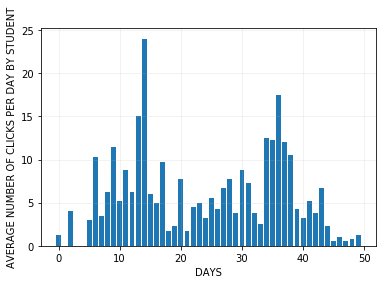

In [272]:
fig = plt.figure(figsize=(6,4))
plt.bar(range(max_days), avg_nclicks, linewidth = 0, figure = fig)
plt.xlabel('DAYS')
plt.ylabel('AVERAGE NUMBER OF CLICKS PER DAY BY STUDENT')
plt.grid(alpha=.2)
# plt.show()
# Save figure
barplot_fname = './barplot.pdf'
plt.savefig(barplot_fname)
# plt.close()